$\Large\textbf{Lab 1. Exercise 2. }$

Now we will consider a slightly different algorithm which can be used to find a minimizer of the function $f(\mathbf{x})=f(x_1,x_2)= (x_1+100)^2 + (x_2-25)^2$. 

$\textbf{[R]}$ Write the function $f(\mathbf{x})$ in the form $\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$, where $\mathbf{x}\in {\mathbb{R}}^2$, $\mathbf{A}$ is a symmetric matrix of size $2 \times 2$, $\mathbf{b}\in{\mathbb{R}}^2$ and $c\in\mathbb{R}$. 



#Ans 1:
Write your answer here:

$\begin{bmatrix} x_1 & x_2 \end{bmatrix}\begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix}\begin{bmatrix} x_1 \\x_2 \end{bmatrix} + 2\begin{bmatrix} 100 & -25 \end{bmatrix}\begin{bmatrix}x_1 \\ x_2\end{bmatrix} + 10625$


$\textbf{[R]}$ It turns out that for a function $f:{\mathbb{R}}^n\rightarrow \mathbb{R}$ of the form $f(\mathbf{x})=\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$, where $\mathbf{A}\in{\mathbb{R}}^{n \times n}$ is a symmetric matrix, $\mathbf{b} \in {\mathbb{R}}^n$ and $c\in \mathbb{R}$, the analytical solution to $\min_{\alpha \geq 0} f(\mathbf{x} - \alpha \nabla f(\mathbf{x}))$ can be found in closed form. Find the solution. 

#Ans 2:
Write your answer here:

We can see that $\nabla f(\mathbf{x}) = 2(\mathbf{A}\mathbf{x}+\mathbf{b})$

We substitute $\mathbf{x} - \alpha \nabla f(\mathbf{x})$ in $f(\mathbf{x})=\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$ and then compute the derivative of the resultant with respect to $\alpha$.

On equating the resultant to zero we can get the required solution : 

$\alpha = [\ (\ \mathbf{x} + \mathbf{b} (\ \mathbf{A}^{-1} )\ ^{T} )\ . \mathbf{T_1}^{T} ]\ . \mathbf{T_2}^{-1}$

where

$\mathbf{T_1} = 2 (\ \mathbf{A}\mathbf{x}+\mathbf{b}) \\ \mathbf{T_2} = \mathbf{T_1}.\mathbf{T_1}^{T}$

We will use this idea to construct a suitable step length finding procedure for our modified algorithm given below: 


\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
&\textbf{While } \| \nabla f(\mathbf{x}^k) \|_2 > \tau \text{ do:}  \\   
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} \leftarrow \mathbf{x}^k - \eta^k \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

In [1]:
#numpy package will be used for most of our lab exercises. Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [2]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  return (x[0]+100)**2 + (x[1]-25)**2


In [3]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  return np.array([2*(x[0]+100),2*(x[1]-25)])

In [112]:
#Complete the module to compute the steplength
def compute_steplength(start_x): #add appropriate arguments to the function 
  #Complete the code
  assert type(start_x) is np.ndarray and len(start_x) == 2
  A = np.identity(2)
  b = np.array([100,-25])
  t1 = np.add(2*np.matmul(A,start_x),2*b)
  t2 = np.matmul(t1,t1.transpose())

  step_length = np.matmul(np.add(x,np.matmul(b,np.linalg.inv(A).transpose())),t1.transpose())/t2

  return step_length

In [113]:
def find_minimizer(start_x, tol):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x)
  k = 0
  print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    step_length = compute_steplength(x) #call the new function you wrote to compute the steplength
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
    print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x 


In [114]:
my_start_x = np.array([10,10])
my_tol= 1e-3
find_minimizer(my_start_x, my_tol)

iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-100.   25.]  f(x): 0.0  grad at x: [0. 0.]  gradient norm: 0.0


array([-100.,   25.])

In [118]:
def find_minimizer(start_x, tol):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x)
  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    step_length = compute_steplength(x) #call the new function you wrote to compute the steplength
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return k, x 


In [119]:
no_of_iterations = []
tolerance = []
for i in range(1,11):
  my_tol = 10**-i
  k, opt = find_minimizer(my_start_x, my_tol)
  tolerance.append(my_tol)
  no_of_iterations.append(k)

In [120]:
for i in range(10):
  print('For tolerance =',tolerance[i],'\nNo. of iterations :',no_of_iterations[i],'\n')

For tolerance = 0.1 
No. of iterations : 1 

For tolerance = 0.01 
No. of iterations : 1 

For tolerance = 0.001 
No. of iterations : 1 

For tolerance = 0.0001 
No. of iterations : 1 

For tolerance = 1e-05 
No. of iterations : 1 

For tolerance = 1e-06 
No. of iterations : 1 

For tolerance = 1e-07 
No. of iterations : 1 

For tolerance = 1e-08 
No. of iterations : 1 

For tolerance = 1e-09 
No. of iterations : 1 

For tolerance = 1e-10 
No. of iterations : 1 



#Ans 4:

We can observe in this case the no. of iterations taken is always 1 irrespective of the change in tolerance which is in total contrast to the case when step length was constant.

Text(0, 0.5, 'No. of iterations')

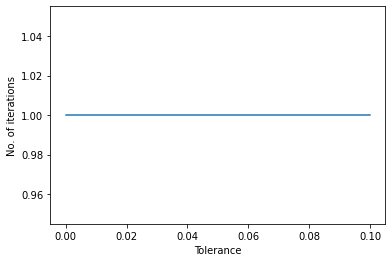

In [122]:
import matplotlib.pyplot as plt

plt.plot(tolerance, no_of_iterations)
plt.xlabel('Tolerance')
plt.ylabel('No. of iterations')

${\Large\text{Do not forget to rename the file before submission.}}$